In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/metabric.csv') # Metabric Cancer Data
df.head(3).T

,0,1,2
Age at Diagnosis,43.19,48.87,47.68
Type of Breast Surgery,BREAST CONSERVING,MASTECTOMY,MASTECTOMY
Cancer Type,Breast Cancer,Breast Cancer,Breast Cancer
Chemotherapy,NO,YES,YES
Hormone Therapy,YES,YES,YES
Lymph nodes examined positive,0.0,1.0,3.0
Mutation Count,2.0,2.0,1.0
Nottingham prognostic index,4.02,4.03,4.05
Overall Survival (Months),84.633333,163.7,164.933333
Overall Survival Status,0:LIVING,1:DECEASED,0:LIVING


Exercise 2: Quantiles, IQR, Whiskers, Boxplot, Outliers
From the ECDF, we get a fairly good picture of the distribution of the data: A quantile adjusts the concept of the median so that instead of 50% of the mass below and 50% above, the 
-quantile has 
% of the mass below and 
% of the mass above.

Write a Python class or set of functions that:

Computes the ECDF 
Has a method to compute any quantile without using Numpy
Has a method to compute the Interquartile Range (IQR) -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the whiskers: 
 from the edges of the IQR
Has a method to compute a five-number summary/boxplot: the whiskers, the minimum and maximum, the IQR and the median
Compare your answers with sns.boxplot; making a boxplot yourself is kind of a pain, but you could make a 5-number summary visualization
Anything outside the whiskers is an outlier; write a method that returns a Boolean vector indicating if the observations are outliers

In [3]:
def compute_quantile(data, q=0.5):
    data = np.sort(data)
    pos = (len(data) - 1) * q
    lower = int(np.floor(pos))
    upper = int(np.ceil(pos))
    if lower == upper:
        return data[int(pos)]
    return data[lower] + (pos - lower) * (data[upper] - data[lower])


In [4]:
def calc_IQR(data):
    q1 = compute_quantile(data, 0.25)
    q3 = compute_quantile(data, 0.75)
    iqr = q3 - q1
    left_whisker = q1 - 1.5 * iqr
    right_whisker = q3 + 1.5 * iqr
    return [iqr, left_whisker, right_whisker]

In [5]:
print (calc_IQR(df["Age at Diagnosis"]))

[np.float64(18.769999999999996), np.float64(22.890000000000008), np.float64(97.97)]


In [12]:
def five_num_summary(data):
    q1 = compute_quantile(data, 0.25)
    q3 = compute_quantile(data, 0.75)
    median = compute_quantile(data, 0.5)
    whisker_high = min(q3 + 1.5 * (q3 - q1), data.max())
    whisker_low = max(q1 - 1.5 * (q3 - q1), data.min())
    return [data.min(), whisker_low, q1, median, q3, whisker_high, data.max()]

[21.93, np.float64(22.890000000000008), np.float64(51.045), np.float64(61.14), np.float64(69.815), 96.29, 96.29]


<Axes: xlabel='Cancer Type', ylabel='Age at Diagnosis'>

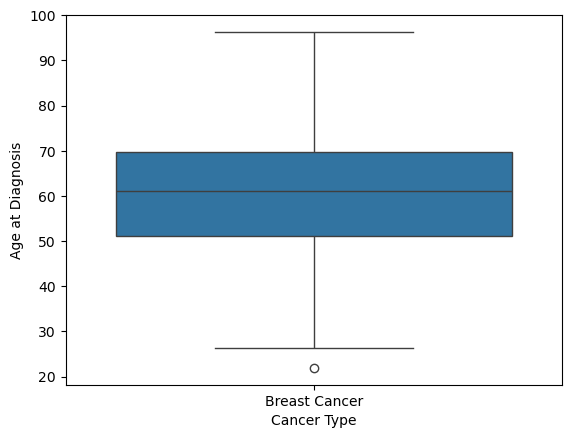

In [13]:
import seaborn as sns
print(five_num_summary(df["Age at Diagnosis"]))
sns.boxplot(x="Cancer Type", y="Age at Diagnosis", data=df)

In [8]:
def find_outliers(data):
    q1 = compute_quantile(data, 0.25)
    q3 = compute_quantile(data, 0.75)
    return (data < (q1 - 1.5 * (q3 - q1))) | (data > (q3 + 1.5 * (q3 - q1)))

In [9]:
for a in find_outliers(df["Age at Diagnosis"]):
    print(a)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals